# 2.9. Line Charts
A line chart is useful for showing trends over time, or  correlation between two variables. However, a scatterplot is easier when there are many  data points in your dataset. Line charts can show trends over time and it is often used to show different categories of data. A line chart is often used for:
- Understanding the distribution of the data
- Comparing low and high values
- Showing Trends
- Understanding Relationship between values

## Guideline for Line Charts:
- Line should be solid and can be seen clearly
- Avoid using more than 6 lines to avoid visual distractions.<br>
- When the data is in a continuous data set, line charts work the best


## 2.9.1 Line Chart using Matplotlib

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd




In [2]:
# Create some data
rng = np.random.RandomState(0)

# help(np.random.RandomState)

y = np.cumsum(rng.randn(500, 4), 0)

y.shape


(500, 4)

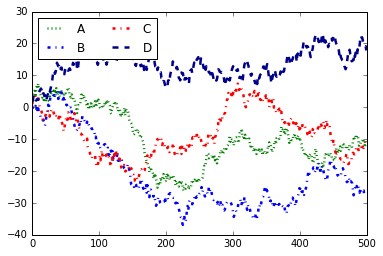

In [3]:

# Plot the data with Matplotlib defaults
#plt.plot(x, y)
#plt.plot(x,  color="blue", linewidth=1.0, linestyle="-")
plt.plot(y[0:,0],  color="green", linewidth=2.5, linestyle="dotted")
plt.plot(y[0:,1],  color="blue", linewidth=2.5, linestyle="dashdot")
plt.plot(y[0:,2],  color="red", linewidth=2.5, linestyle="dashdot")
plt.plot(y[0:,3],  color="darkblue", linewidth=2.5, linestyle="dashed")

plt.legend('ABCD', ncol=2, loc='upper left');

## 2.9.2. Line Chart using Pandas.plot

In [4]:
import pandas as pd
df=pd.DataFrame({"A": y[0:,0], "B":y[0:,1], "C":y[0:,2], "D":y[0:,3] })

In [5]:
df.sample(2)

,A,B,C,D
327,-11.738632,-33.386131,4.284267,9.878502
368,-9.354920,-30.516156,-0.991808,9.747279


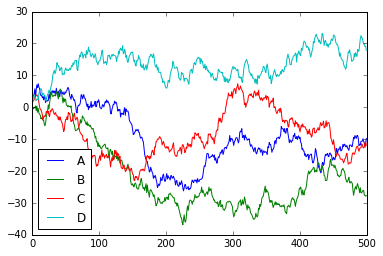

In [6]:
df.plot()

## 2.9.3 Line Chart Using Seaborn

In [7]:
import seaborn as sns

In [8]:
df.sample(3)

,A,B,C,D
452,-16.472259,-18.165510,-13.357499,22.234814
394,-9.787856,-29.852476,-5.261776,16.678518
159,-7.805437,-25.470736,-22.057695,16.272085


In [9]:
df['X']=df.index.get_values()

In [10]:
formated=pd.melt(df,["X"], var_name="Group", value_name="Y")

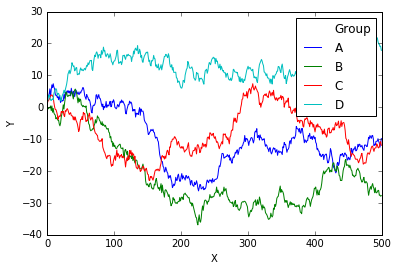

In [11]:
ax = sns.lineplot(x="X", y="Y", hue="Group",   data=formated)

<center>
  <a href="2.7-Bar-Chart.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="2.9-Boxplot.ipynb">Next Page</a></center>
</center>

# Examples using Cars Dataset

In [12]:
import pandas as pd
# load cars.csv data into dataframe named cars
cars = pd.read_csv("cars.csv",index_col=None)

In [13]:
cars.sample(2)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Color
179,Volkswagen Dasher,25.0,4,90.0,71,2223,16.5,75,Europe,green
16,Plymouth 'Cuda 340,14.0,8,340.0,160,3609,8.0,70,US,blue


In [14]:
cars=cars[['MPG', 'Origin', 'Model']]

In [15]:
cars.Origin.unique()

array(['US', 'Europe', 'Japan'], dtype=object)

In [16]:
cars.Model.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [17]:
df1=cars.copy()

In [18]:
df1.index=cars.Model

In [19]:
df1=cars.groupby(['Origin', 'Model']).MPG.mean()

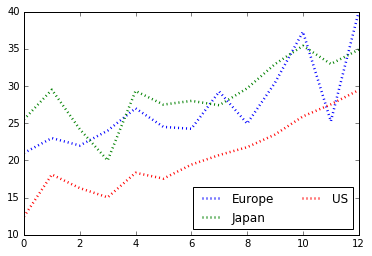

In [20]:
for name, new_df1 in df1.groupby(level="Origin"):
    plt.plot(new_df1.tolist(),   linewidth=2.5, linestyle="dotted", label=name)
    plt.legend( ncol=2, loc='lower right');
    
plt.show()


##### Another way (e.g., Only specific countries: Customisation)

In [30]:
grouped=cars.groupby([cars.Origin, cars.Model])

In [31]:
groupedmean=grouped.mean()

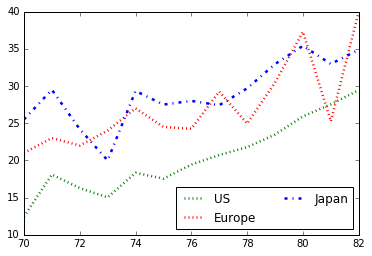

In [32]:
plt.plot(groupedmean.xs('US').MPG,  color="green", linewidth=2.5, linestyle="dotted", label="US")
plt.plot(groupedmean.xs('Europe').MPG,  color="red", linewidth=2.5, linestyle="dotted", label="Europe")
plt.plot(groupedmean.xs('Japan').MPG,  color="blue", linewidth=2.5, linestyle="dashdot", label="Japan")


plt.legend( ncol=2, loc='lower right');


In [33]:
import pandas as pd
# load cars.csv data into dataframe named cars
cars = pd.read_csv("cars.csv",index_col=None)

In [34]:
cars=cars[['MPG', 'Origin', 'Model']]

In [35]:
df=cars.groupby(['Origin','Model']).MPG.mean().reset_index()

In [36]:
df.sample(5)

,Origin,Model,MPG
3,Europe,73,24.000000
15,Japan,72,24.200000
10,Europe,80,37.288889
14,Japan,71,29.500000
31,US,75,17.550000


In [37]:
df.index=df.Model

Origin
Europe    AxesSubplot(0.125,0.125;0.775x0.775)
Japan     AxesSubplot(0.125,0.125;0.775x0.775)
US        AxesSubplot(0.125,0.125;0.775x0.775)
Name: MPG, dtype: object

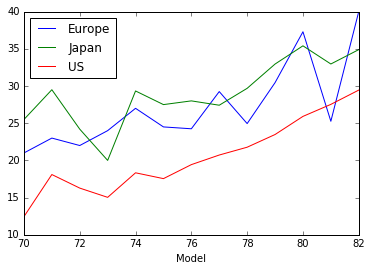

In [38]:
df.groupby('Origin')['MPG'].plot(legend=True)

C:\ProgramData\Anaconda2\envs\ipykernel_py3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


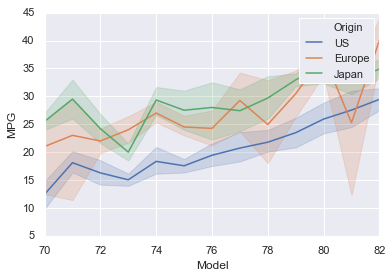

In [39]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="Model", y="MPG", hue="Origin", data=cars)